Import

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression

Make regressor

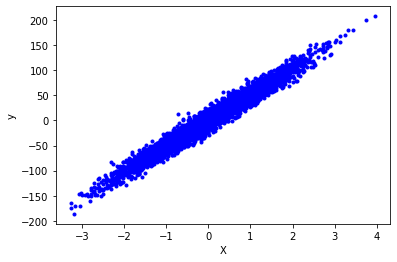

In [105]:
X, y = make_regression(n_samples=6000, n_features=1, n_informative=1, noise=10, random_state=1)

df = pd.DataFrame({'X': X.flatten(), 'y': y})

plt.scatter(X, y, color='blue', marker='.', label='y')
plt.xlabel("X") 
plt.ylabel("y")
plt.show()

In [106]:
df

,X,y
0,0.142778,14.631436
1,-0.427815,-11.954687
2,0.307489,9.987563
3,-1.068460,-45.115161
4,-1.060274,-49.338830
...,...,...
5995,-0.030801,18.515081
5996,-0.227560,-6.821930
5997,-1.363277,-78.706330
5998,0.031925,12.979807


Analyse y

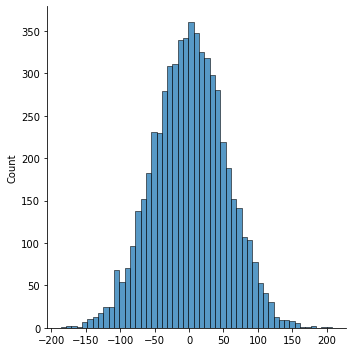

In [107]:
sns.displot(y)

Estimate model with statsmodels

In [108]:
import statsmodels.formula.api as smf

model = smf.ols(formula = 'y~X', data=df).fit()

b0 = model.params[0]
b1 = model.params[0]
df['BestResponse'] = b0 + b1 * X
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.604e+05
Date:                Sun, 29 Aug 2021   Prob (F-statistic):               0.00
Time:                        02:37:38   Log-Likelihood:                -22315.
No. Observations:                6000   AIC:                         4.463e+04
Df Residuals:                    5998   BIC:                         4.465e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2262      0.129      1.756      0.079      -0.026       0.479
X             51.5331      0.129    400.477      0.000      51.281      51.785
==============================================================================
Omnibus:                        7.009   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.717
Skew:                           0.032   Prob(JB):                       0.0211
Kurtosis:                       3.164   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Independence between samples

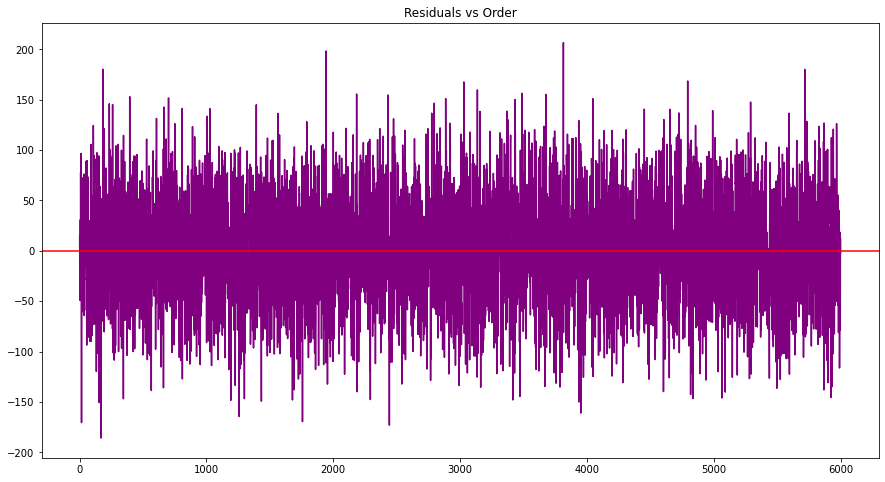

In [109]:
df['error'] = y - df['BestResponse']
plt.figure(figsize=(15,8))
plt.title("Residuals vs Order")
plt.plot(df.index, df['error'], color='purple')
plt.axhline(y=0, color='red')
plt.show()

Normality validation

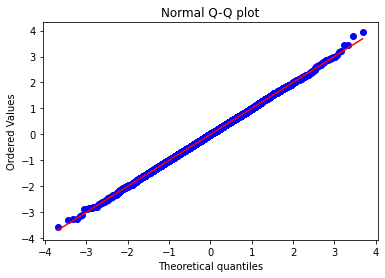

In [110]:
import scipy.stats as stats

z = (df['error'] - df['error'].mean()) / df['error'].std(ddof=1)

stats.probplot(z, dist='norm', plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

Equal variance

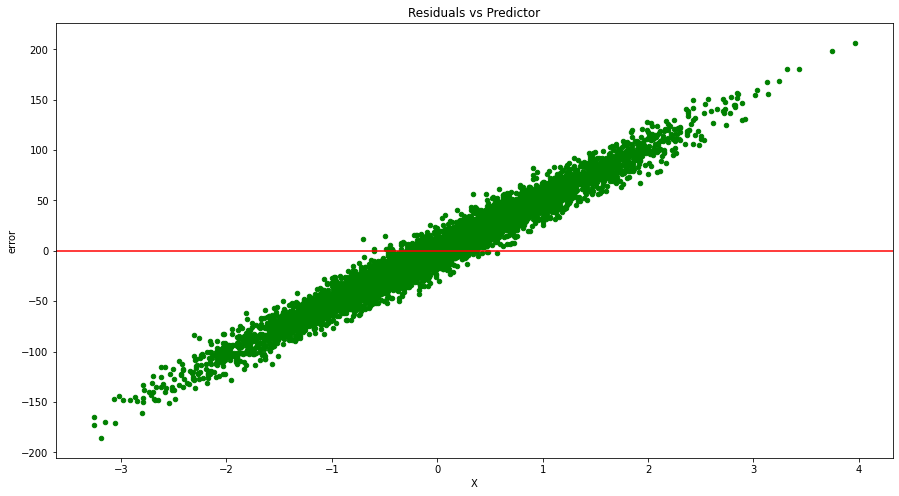

In [111]:
df.plot(kind='scatter', x='X', y='error', figsize=(15,8), color='green')
plt.title("Residuals vs Predictor")
plt.axhline(y=0, color='red')
plt.show()

Simple linear regression model

In [112]:
b0 = 1
b1 = 2

df['GuessResponse'] = b0 + b1 * X

df['ObservedError'] = y - df['GuessResponse']
indices = [7, 20, 100, 1000, 2000, 3000]
print(df['ObservedError'].loc[indices])

7       -34.946480
20        9.880763
100      29.152134
1000     23.113580
2000    113.735750
3000    -42.365136
Name: ObservedError, dtype: float64


In [113]:
print("Sum of squared error is: ", (df['error']**2).sum())

Sum of squared error is:  16428206.302457627


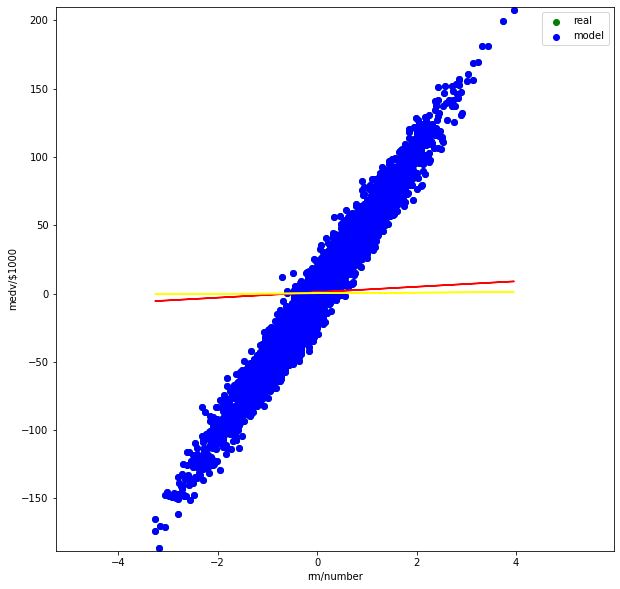

In [114]:
plt.figure(figsize=(10,10))
plt.scatter(X, y, color='g', label='real')
plt.scatter(X, y, color='b', label='model')
plt.plot(X, df['GuessResponse'], color='red')
plt.plot(X, df['BestResponse'], color='yellow')
plt.ylabel('medv/$1000')
plt.xlabel('rm/number')
plt.xlim(np.min(X)-2, np.max(X)+2)
plt.ylim(np.min(y)-2, np.max(y)+2)
plt.legend()
plt.show()

Define X and y

In [115]:
#X and y are defined when dataset was created
#X = df.iloc[:, :-1].values
#y = df.iloc[:, 1].values

Split dataset for training and validating

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.10, random_state=1)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((5400, 1), (5400,), (600, 1), (600,))

Define model - Linear Regression

In [117]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9638687483332455


In [118]:
print(model.intercept_)

0.17780990731375257


In [119]:
print(model.coef_)


[51.56397868]


Predict on validation set

In [120]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.9646315099106726


Evaluate

In [121]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Mean Absolute Error: 7.929534404027809
Mean Squared Error: 100.72176637497162
Root Mean Squared Error: 10.036023434357435


Compare

In [122]:
compare = pd.DataFrame({'actual': y_val, 'predicted': y_pred})
print(compare)

         actual   predicted
0     23.422867   26.352244
1     18.074170   30.736976
2    -93.991288  -88.056803
3     41.062941   21.750215
4    -60.568193  -56.141064
..          ...         ...
595   16.595959   22.014864
596  -19.502455  -23.186084
597   94.801067  110.339377
598  101.035864  101.956738
599  -41.180174  -53.998927

[600 rows x 2 columns]


Plot

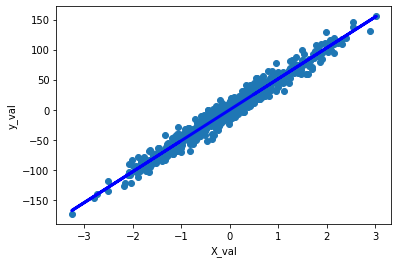

In [123]:
plt.scatter(X_val, y_val)
plt.plot(X_val, y_pred, color='blue', linewidth=3)
plt.xlabel('X_val')
plt.ylabel('y_val')
plt.show()